In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, classification_report, accuracy_score

In [2]:
plt.rcParams['figure.figsize']=(25, 8)

In [3]:
data_read = pd.read_csv('course_project_train.csv')
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [4]:
def renams(data):
    name_columns = {'Home Ownership': 'домовладение', 'Annual Income': 'годовой доход', 'Years in current job': 'количество лет на текущем месте работы',
            'Maximum Open Credit': 'наибольший открытый кредит', 'Number of Credit Problems': 'количество проблем с кредитом',
            'Months since last delinquent': 'количество месяцев с последней просрочки платежа', 'Bankruptcies': 'банкротства',
            'Purpose': 'цель кредита', 'Term': 'срок кредита', 'Current Loan Amount': 'текущая сумма кредита',
            'Current Credit Balance': 'текущий кредитный баланс', 'Monthly Debt': 'ежемесячный долг', 'Credit Score': 'кредитный рейтинг',
            'Credit Default': '0 - погашен вовремя, 1 - просрочка', 'Tax Liens': 'налоговые льготы', 
           'Number of Open Accounts': 'количество открытых счетов', 'Years of Credit History': 'количество лет кредитной истории'}
    data.rename(columns=name_columns, inplace=True)
    return data

In [5]:
data_read = renams(data_read)

In [6]:
data_read['кредитный рейтинг'][data_read['кредитный рейтинг']> 1000] = 0

### data, target 

In [7]:
data = data_read.drop('0 - погашен вовремя, 1 - просрочка', axis=1)
target = data_read['0 - погашен вовремя, 1 - просрочка']

### dummy переменные

In [8]:
def dummy(data, name):
    x = data[name].unique()
    for i in range(len(data[name].unique())):
        y = name+'_'+ str(i)
        data[y] = 3
        data[y][data[name]==x[i]] = 1
        data[y][data[name]!=x[i]] = 0
    data.drop(name, axis=1, inplace=True)
            
            
# dummy('домовладение')

### заполнение пропусков

In [9]:
def god_dohod(data):
    data['годовой доход'].fillna(0, inplace=True)
    data['кредитный рейтинг'].fillna(0, inplace=True)
    data['банкротства'].fillna(0, inplace=True)
    data['количество месяцев с последней просрочки платежа'].fillna(0, inplace=True)
    return data

### 

In [10]:
data = god_dohod(data)
dummy(data, 'домовладение')
dummy(data, 'количество лет на текущем месте работы')
dummy(data, 'цель кредита')
dummy(data, 'срок кредита')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   годовой доход                                     7500 non-null   float64
 1   налоговые льготы                                  7500 non-null   float64
 2   количество открытых счетов                        7500 non-null   float64
 3   количество лет кредитной истории                  7500 non-null   float64
 4   наибольший открытый кредит                        7500 non-null   float64
 5   количество проблем с кредитом                     7500 non-null   float64
 6   количество месяцев с последней просрочки платежа  7500 non-null   float64
 7   банкротства                                       7500 non-null   float64
 8   текущая сумма кредита                             7500 non-null   float64
 9   текущий кредитный б

### проба без обработки данных

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
from xgboost import XGBClassifier


[06:42:07] WARNING: ..\src\learner.cc:541: 
Parameters: { verbocity } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:42:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:42:08] WARNING: ..\src\learner.cc:541: 
Parameters: { verbocity } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:42:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluat

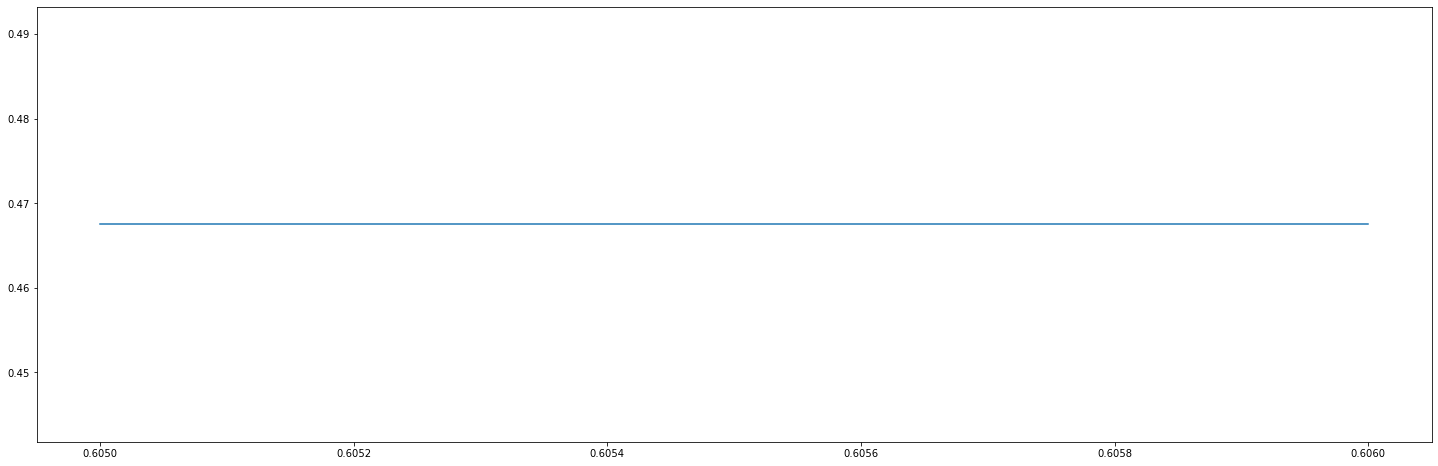

In [12]:
qwe = []
qw = []
q = (i/1000 for i in range(605, 607))
for i in q:
    xgb = XGBClassifier(eta=0.62, verbocity=0, max_depth=8, n_jobs=7)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    qw.append(f1_score(y_test, y_pred))
    qwe.append(i)
print(classification_report(y_test, y_pred))
plt.plot(qwe, qw)
plt.show()

In [13]:
f1_score(y_test, y_pred)

0.46750902527075816

### подготовка данных

In [14]:
from scipy.stats import shapiro, ttest_ind, chi2, mannwhitneyu

In [15]:
del_data = []
good_data = []
for i in data.keys():
    if len(data[i].unique())>2:
        if shapiro(data[i]).pvalue > 0.05:
            print(i , 'норм' if ttest_ind(data[i][target == 0], data[i][target == 1]).pvalue <= 0.05 else 'удаляем')
            good_data.append(i) if ttest_ind(data[i][target == 0], data[i][target == 1]).pvalue <= 0.05 else del_data.append(i)
        elif shapiro(data[i]).pvalue < 0.05:
            print(i , 'норм' if mannwhitneyu(data[i][target == 0], data[i][target == 1]).pvalue <= 0.05 else 'удаляем')
            good_data.append(i) if mannwhitneyu(data[i][target == 0], data[i][target == 1]).pvalue <= 0.05 else del_data.append(i)
    

годовой доход норм
налоговые льготы норм
количество открытых счетов норм
количество лет кредитной истории норм
наибольший открытый кредит норм
количество проблем с кредитом удаляем
количество месяцев с последней просрочки платежа удаляем
банкротства удаляем
текущая сумма кредита норм
текущий кредитный баланс удаляем
ежемесячный долг норм
кредитный рейтинг норм


In [16]:
del_data, good_data

(['количество проблем с кредитом',
  'количество месяцев с последней просрочки платежа',
  'банкротства',
  'текущий кредитный баланс'],
 ['годовой доход',
  'налоговые льготы',
  'количество открытых счетов',
  'количество лет кредитной истории',
  'наибольший открытый кредит',
  'текущая сумма кредита',
  'ежемесячный долг',
  'кредитный рейтинг'])

In [17]:
# data.drop(del_data, axis=1, inplace=True)

### нахождение важности признаков через RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=10)
rfc.fit(data, target)
y_pred_rfc = rfc.predict(data)

In [19]:
accuracy_score(target, y_pred_rfc)

1.0

<BarContainer object of 45 artists>

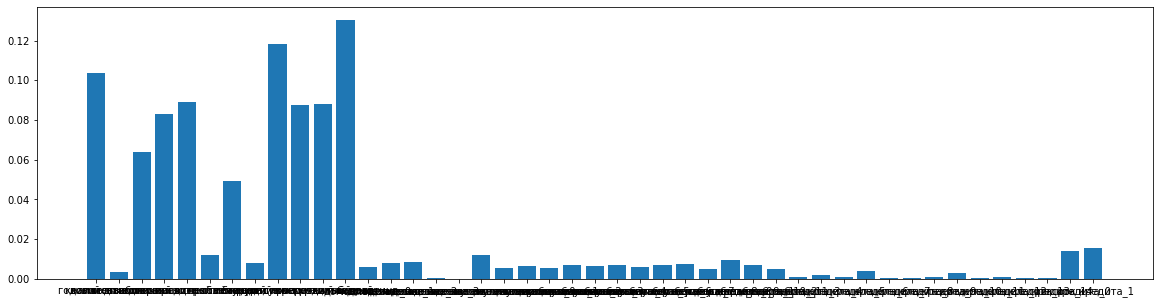

In [20]:
plt.figure(figsize=(20, 5))
plt.bar(data.keys(), rfc.feature_importances_)

In [21]:
rfc_importence = pd.DataFrame()
rfc_importence['w'] = rfc.feature_importances_
rfc_importence['key'] = data.keys()
rfc_importence

,w,key
0,0.103426,годовой доход
1,0.003315,налоговые льготы
2,0.063836,количество открытых счетов
3,0.082806,количество лет кредитной истории
4,0.089092,наибольший открытый кредит
5,0.011854,количество проблем с кредитом
6,0.049093,количество месяцев с последней просрочки платежа
7,0.007903,банкротства
8,0.118292,текущая сумма кредита
9,0.087772,текущий кредитный баланс


### удаление не важных признаков.

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1592
           1       0.55      0.38      0.45       658

    accuracy                           0.73      2250
   macro avg       0.66      0.63      0.64      2250
weighted avg       0.71      0.73      0.71      2250



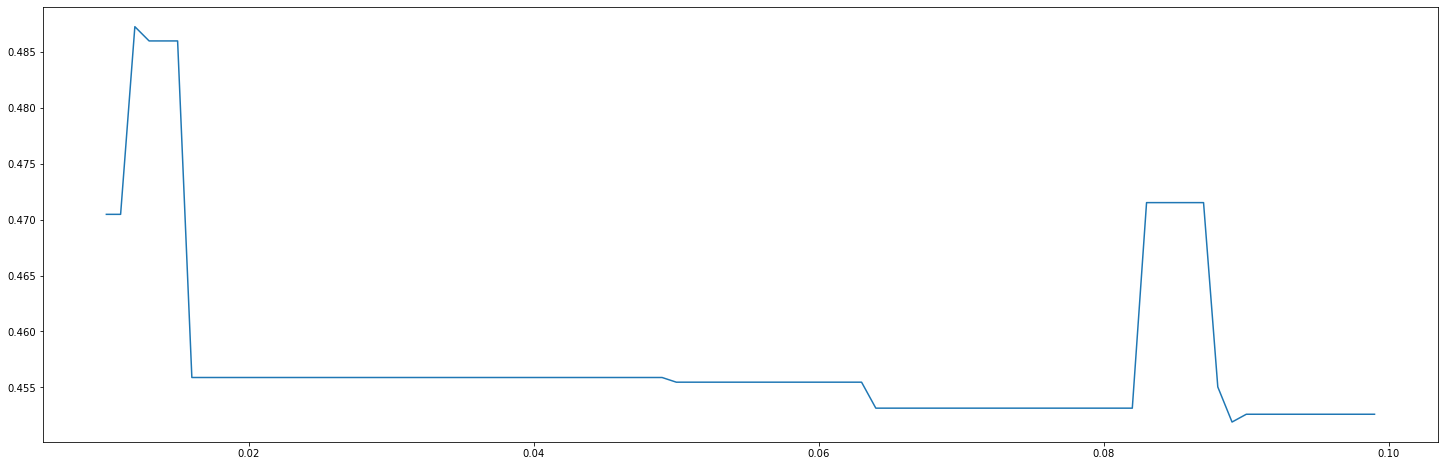

In [28]:
# находим параметр удаления признаков

qw = []
q = [i/1000 for i in range(10, 100)]
for i in q:
    data_1 = data.copy()
    data_1.drop(list(rfc_importence['key'][rfc_importence['w']<i]), axis=1, inplace=True)
    x_train, x_test, y_train, y_test = train_test_split(data_1, target, test_size=0.3, random_state=42)
    xgb = XGBClassifier(eta=0.62,  verbosity=0, max_depth=8, n_jobs=7)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    qw.append(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.plot(q, qw)
plt.show()

### удаляем

In [ ]:
data.drop(list(rfc_importence['key'][rfc_importence['w']<0.012]), axis=1, inplace=True)

### подбор параметров через графики

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      1592
           1       0.60      0.37      0.46       658

    accuracy                           0.74      2250
   macro avg       0.69      0.63      0.65      2250
weighted avg       0.72      0.74      0.72      2250



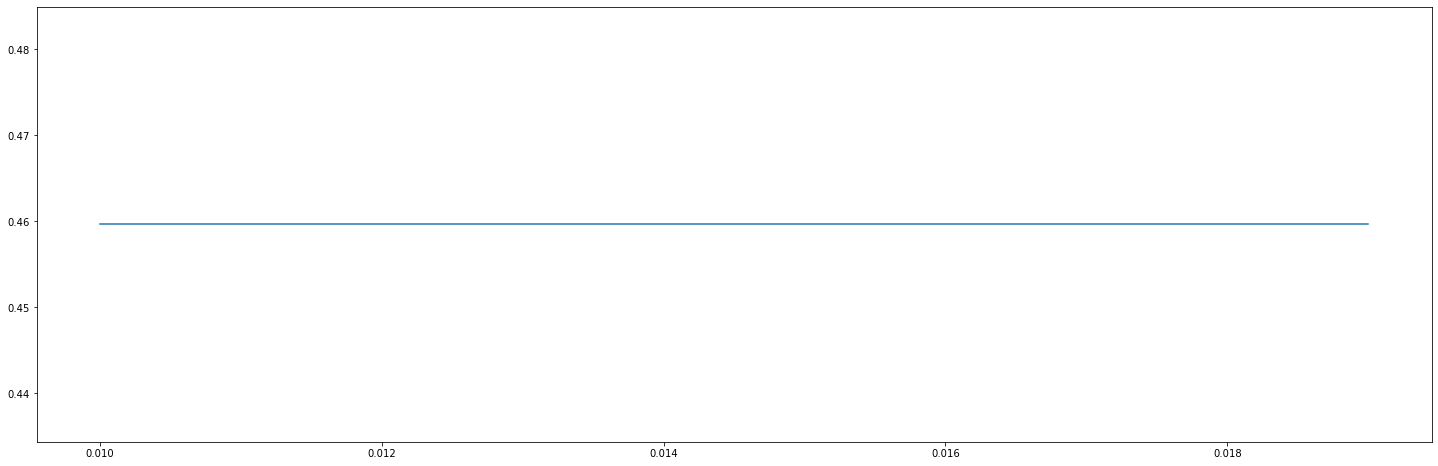

In [30]:

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
qw = []
q = [i/1000 for i in range(10, 20)]
for i in q:
    xgb = XGBClassifier(eta=0.62, n_estimators=14, verbosity=0, max_depth=8, n_jobs=7, reg_alpha=0.001) 
    # eta=0.01, max_depth=3, verbosity=0,  n_estimators=14, n_jobs=7, reg_alpha=0.001
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    qw.append(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.plot(q, qw)
plt.show()

In [31]:
y_proba = xgb.predict_proba(x_test)
y_proba = pd.DataFrame(y_proba, columns=['1', '2'])
y_proba

,1,2
0,0.039548,0.960452
1,0.931493,0.068507
2,0.790115,0.209885
3,0.720497,0.279503
4,0.999078,0.000922
...,...,...
2245,0.759497,0.240503
2246,0.035925,0.964075
2247,0.855769,0.144231
2248,0.084554,0.915446


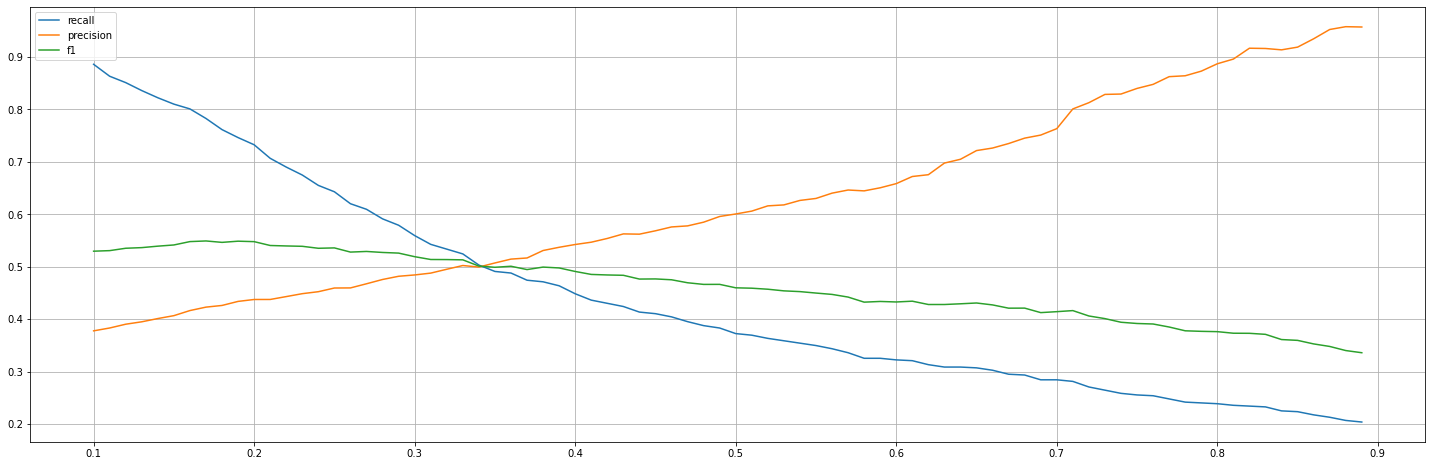

In [32]:
rec = []
pre = []
f11 = []
qw = []
q = (i/100 for i in range(10, 90))
for i in q:
    y_pred_proba = np.asarray([np.where(line>i, 1, 0) for line in y_proba['2']])
    rec.append(recall_score(y_test, y_pred_proba))
    pre.append(precision_score(y_test, y_pred_proba))
    f11.append(f1_score(y_test, y_pred_proba))
    qw.append(i)
y_pred_proba

plt.plot(qw, rec, label='recall')
plt.plot(qw, pre, label='precision')
plt.plot(qw, f11, label='f1')
plt.legend()
plt.grid()
plt.show()

In [ ]:
y_pred_train = xgb.predict_proba(x_train)
y_pred_train = pd.DataFrame(y_pred_train, columns=['1', '2'])
y_pred_train_ = np.asarray([np.where(line>0.470, 1, 0) for line in y_pred_train['2']])
y_pred_proba = np.asarray([np.where(line>0.470, 1, 0) for line in y_proba['2']])
print(f1_score(y_test, y_pred_proba))
print(f1_score(y_train, y_pred_train_))
print(classification_report(y_test, y_pred_proba))

In [ ]:
aaaa

### подбор гиперпараметров

In [ ]:
# %time
# from sklearn.model_selection import GridSearchCV
# parametrs = { 'n_estimators': range(10, 30),
#               'max_depth': range(1,5),
#               'eta': [i/100 for i in range(1, 80, 5)],
#               'reg_alpha': [i/1000 for i in range(1, 100, 10)]}
# grid = GridSearchCV(xgb, parametrs, cv=3, verbose=10, refit=True)
# grid.fit(data, target)
# grid.best_params_

In [ ]:
{'eta': 0.01, 'max_depth': 3, 'n_estimators': 14, 'reg_alpha': 0.001}

### окончательная модель

In [ ]:
xgb = XGBClassifier(eta=0.01, max_depth=3, verbosity=0,  n_estimators=14, n_jobs=7, reg_alpha=0.001)
xgb.fit(data, target)
y_pred_train_ = np.asarray([np.where(line>0.470, 1, 0) for line in xgb.predict_proba(data)[:, 1]])
f1_score(target, y_pred_train_), accuracy_score(target, y_pred_train_)

In [ ]:
data_test = pd.read_csv('course_project_test.csv')
data_test = renams(data_test)
data_test = god_dohod(data_test)
# data_test.drop(del_data, axis=1, inplace=True)
data_test['кредитный рейтинг'][data_test['кредитный рейтинг']> 1000] = 0
dummy(data_test, 'домовладение')
dummy(data_test, 'количество лет на текущем месте работы')
dummy(data_test, 'цель кредита')
dummy(data_test, 'срок кредита')
data_test

In [ ]:

data_test['цель кредита_14'] = 0
data_test.drop(list(rfc_importence['key'][rfc_importence['w']<0.014]), axis=1, inplace=True)

In [ ]:
print(data_test.keys(), len(data_test.keys()))
print(data.keys(), len(data.keys()))

In [ ]:
y_pred_test_data = pd.DataFrame(data_test.index, columns=['id'])
y_pred_test_data['Credit Default'] = np.asarray([np.where(line>0.469, 1, 0) for line in xgb.predict_proba(data_test)[:, 1]])
y_pred_test_data

In [ ]:
y_pred_test_data.to_csv('PMakov_predictions.csv', index=False)
x = pd.read_csv('PMakov_predictions.csv')
x